# Raw Datasets: #

***GOLD DATA***


This dataset tracks monthly gold prices from January 1950 to July 2020. Gold has served as a store of value and medium of exchange for centuries and continues to play a key role in financial markets. Various factors, including global economic conditions, geopolitical events, and supply-demand dynamics, influence its price. The dataset includes 847 entries provided by The World Gold Council

https://www.kaggle.com/datasets/nhiyen/monthly-gold-price

https://ca.investing.com/commodities/gold-historical-data



***BTC DATA***

This dataset shows Bitcoin prices starting from October 5, 2009, when its first exchange value was set by the New Liberty Standard. Bitcoin was the first cryptocurrency, created as a digital currency that doesn’t rely on banks or governments. Its price changes based on factors like how many people are using it, market trends, regulations, and the economy. The dataset tracks Bitcoin’s growth from its early days to becoming a major part of global finance.

https://github.com/davidmunozlahoz/btc-historical-price?tab=readme-ov-file

https://ca.investing.com/indices/investing.com-btc-usd



***INTEREST RATE AND VIX DATA***

This dataset includes interest rates and the VIX, both important tools for understanding financial markets. Interest rates, set by central banks, influence borrowing costs and economic activity. When rates rise, borrowing gets more expensive, which can lower spending and investment. When they drop, the economy often speeds up. These changes affect the value of assets like Bitcoin and Gold.

The VIX, known as the "fear index," measures how much volatility investors expect in the stock market. High VIX levels usually mean uncertainty or fear in the market, often during recessions or crises. By including interest rates and VIX data, we can see how economic conditions and market stress impact Bitcoin and Gold prices over time.

https://fred.stlouisfed.org/series/VIXCLS

https://fred.stlouisfed.org/series/DFF



# Goal of Analysis - *Is Bitcoin a Hedge During a Recession Similar to Gold?* #

In this analysis, I examine whether Bitcoin acts as a hedge during recessions, similar to how gold is traditionally viewed. Gold has long been seen as a safe haven during economic uncertainty, while Bitcoin’s role is still debated.

I compare Bitcoin and gold by looking at features like their prices, volatility, and performance during key recession periods. To understand how they respond to economic changes, I include factors like interest rates and the VIX. Interest rates show how central bank policies impact the economy, while the VIX measures market fear and uncertainty. By combining these factors, my analysis aims to see if Bitcoin, like gold, provides stability and value during times of economic hardship.




# Gold Data - Loading and Cleaning #

In [ ]:
import pandas as pd

# Load the first dataset 1950-2020 (Kaggle.com)
monthly_data = pd.read_csv("monthly_csv.csv")
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Load the second dataset 2022-2024 (Investing.com)
monthly_data_2024 = pd.read_csv("Gold_Futures_Historical_Data.csv")
monthly_data_2024['Date'] = pd.to_datetime(monthly_data_2024['Date'])

# Load the third dataset 2020-2022 (Investing.com)
monthly_data_2020 = pd.read_csv("Gold(2020-2022).csv")
monthly_data_2020['Date'] = pd.to_datetime(monthly_data_2020['Date'])

# Combine data
combined_data = pd.concat([monthly_data[['Date', 'Price']], monthly_data_2024[['Date', 'Price']], monthly_data_2020[['Date', 'Price']]], ignore_index=True)

# Remove duplicates
final_data = combined_data.drop_duplicates(subset='Date').sort_values(by='Date')

final_data.to_csv("gold_prices_combined.csv", index=False)

print(final_data)


          Date     Price
0   1950-01-01     34.73
1   1950-02-01     34.73
2   1950-03-01     34.73
3   1950-04-01     34.73
4   1950-05-01     34.73
..         ...       ...
851 2024-07-01  2,449.30
850 2024-08-01  2,516.00
849 2024-09-01  2,659.40
848 2024-10-01  2,761.60
847 2024-11-01  2,681.00

[899 rows x 2 columns]


# Bitcoin (BTC) Data - Loading and Cleaning #

In [ ]:
import pandas as pd
import decimal

# Load the Bitcoin prices dataset (Github link)
bitcoin_data = pd.read_csv("BTCprice.csv")
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

#Load the Bitcoin 2024 prices dataset (Investing.com)
bitcoin_data_2024 = pd.read_csv("BitcoinHistoricalData.csv")
bitcoin_data_2024['Date'] = pd.to_datetime(bitcoin_data_2024['Date'])

# Combine data
combined_data_btc = pd.concat([bitcoin_data[['Date', 'Price']], bitcoin_data_2024[['Date', 'Price']]], ignore_index=True)

# Remove duplicates
final_data_btc = combined_data_btc.drop_duplicates(subset='Date').sort_values(by='Date')

final_data_btc.to_csv("btc_prices_combined.csv", index=False)

print(final_data_btc)





           Date     Price
0    2009-10-05  0.000764
1    2009-10-06  0.000885
2    2009-10-07   0.00105
3    2009-10-08  0.001084
4    2009-10-09    0.0012
...         ...       ...
5252 2024-08-01  58,978.6
5251 2024-09-01  63,339.2
5250 2024-10-01  70,281.8
5249 2024-11-01  96,405.7
5248 2024-12-01  97,532.2

[5258 rows x 2 columns]


# Interest Rate and VIX Data - Loading and Cleaning #

In [ ]:
import pandas as pd

# Load the DFF prices dataset (FRED Source)
dff = pd.read_csv("DFF.csv")
dff['DATE'] = pd.to_datetime(dff['DATE'])

# Load the VIXCLS prices dataset (FRED Source)
vixcls = pd.read_csv("VIXCLS.csv")
vixcls['DATE'] = pd.to_datetime(vixcls['DATE'])

# Merge the datasets on 'DATE' 
combined = pd.merge(vixcls, dff, on='DATE', how='inner')

# Remove duplicates
final_macro_economic_data = combined.drop_duplicates(subset='DATE').sort_values(by='DATE')


final_macro_economic_data.to_csv("macro_economic_data.csv", index=False)

# Print the first few rows of the final dataset
print(final_macro_economic_data)

           DATE VIXCLS   DFF
0    2000-01-03  24.21  5.43
1    2000-01-04  27.01  5.38
2    2000-01-05  26.41  5.41
3    2000-01-06  25.73  5.54
4    2000-01-07  21.72  5.61
...         ...    ...   ...
6494 2024-11-22  15.24  4.58
6495 2024-11-25   14.6  4.58
6496 2024-11-26   14.1  4.58
6497 2024-11-27   14.1  4.58
6498 2024-11-28   13.9  4.58

[6499 rows x 3 columns]


# Cleaning and Preparing Data Structure for Analysis #

In [4]:
import pandas as pd

# Load Datasets
btc_combined_data = pd.read_csv("btc_prices_combined.csv")
gold_combined_data = pd.read_csv("gold_prices_combined.csv")

# Ensure the 'Date' columns are in datetime format
btc_combined_data['Date'] = pd.to_datetime(btc_combined_data['Date'])
gold_combined_data['Date'] = pd.to_datetime(gold_combined_data['Date'])

#  Clean and change type of 'Price' columns to float format
gold_combined_data['Price'] = gold_combined_data['Price'].replace('[\$,]', '', regex=True).astype(float)
btc_combined_data['Price'] = btc_combined_data['Price'].replace('[\$,]', '', regex=True).astype(float)

# Merge the datasets on matching dates
merged_data = pd.merge(gold_combined_data, btc_combined_data, on='Date', how='left', suffixes=('_Gold', '_BTC'))

# Round to 2 decimals
merged_data['Price_Gold'] = merged_data['Price_Gold'].round(2)
merged_data['Price_BTC'] = merged_data['Price_BTC'].round(2)

merged_data.to_csv("merged_gold_btc_prices.csv", index=False)

print(merged_data)


          Date  Price_Gold  Price_BTC
0   1950-01-01       34.73        NaN
1   1950-02-01       34.73        NaN
2   1950-03-01       34.73        NaN
3   1950-04-01       34.73        NaN
4   1950-05-01       34.73        NaN
..         ...         ...        ...
894 2024-07-01     2449.30    64626.0
895 2024-08-01     2516.00    58978.6
896 2024-09-01     2659.40    63339.2
897 2024-10-01     2761.60    70281.8
898 2024-11-01     2681.00    96405.7

[899 rows x 3 columns]


# Price Charts of Bitcoin and Gold to Reference through Analysis #

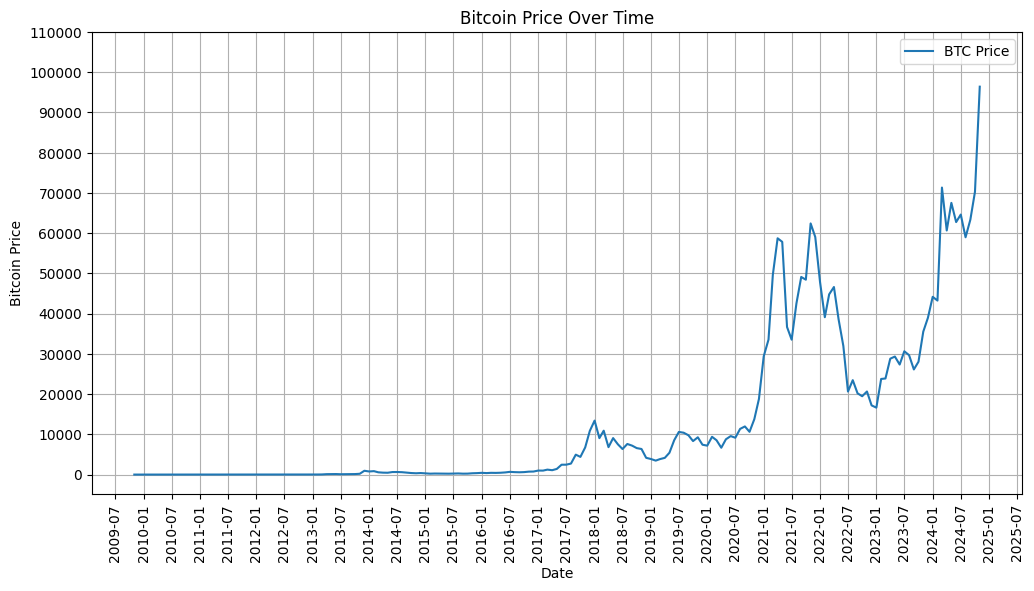

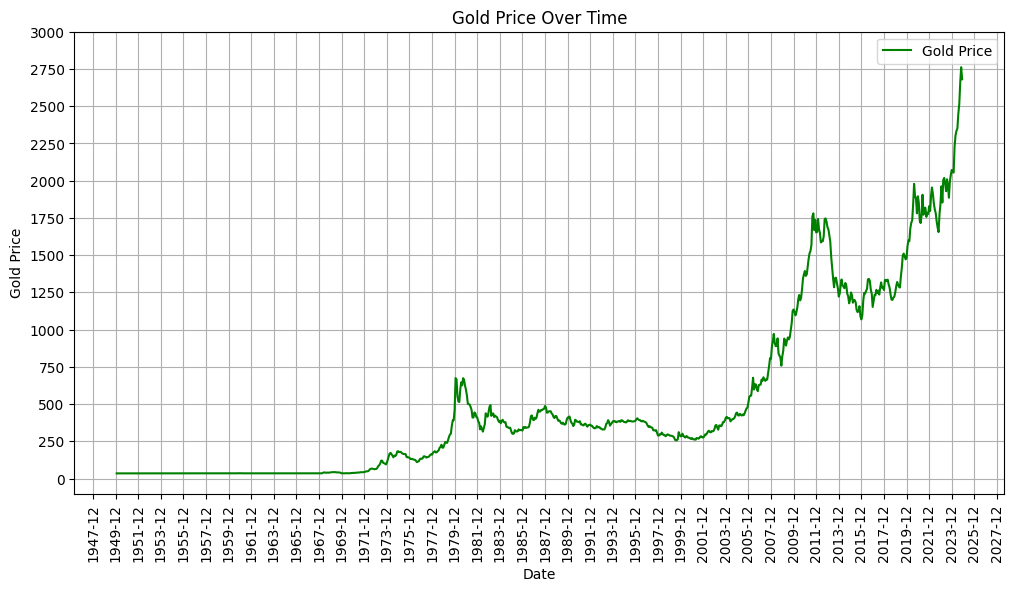

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates  

# Load the merged dataset
df = pd.read_csv("merged_gold_btc_prices.csv")

df['Date'] = pd.to_datetime(df['Date'])


#BTC CHART

plt.figure(figsize=(12, 6))  
plt.plot(df['Date'], df['Price_BTC'], label='BTC Price') 
plt.title("Bitcoin Price Over Time") 

# Set x-axis to show every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set y-axis to increment by 500
plt.yticks(np.arange(0, 120000, 10000))

# Labels
plt.xlabel("Date") 
plt.ylabel("Bitcoin Price") 
plt.xticks(rotation=90)
plt.grid()
plt.legend()  
plt.show() 


#GOLD CHART

plt.figure(figsize=(12, 6)) 
plt.plot(df['Date'], df['Price_Gold'], label='Gold Price', color='green') 
plt.title("Gold Price Over Time") 

# Set x-axis to show every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set y-axis to increment by 500
plt.yticks(np.arange(0, 3100, 250))

# Labels
plt.xlabel("Date") 
plt.ylabel("Gold Price") 
plt.xticks(rotation=90)
plt.legend() 
plt.grid()
plt.show() 


# 1. Correlation Analysis #



Correlation Matrix:
                        Gold Price  Bitcoin Price  Volatility Expectation  \
Gold Price                1.000000       0.814056                0.184590   
Bitcoin Price             0.814056       1.000000                0.043328   
Volatility Expectation    0.184590       0.043328                1.000000   
Interest Rate             0.603901       0.578004               -0.231969   

                        Interest Rate  
Gold Price                   0.603901  
Bitcoin Price                0.578004  
Volatility Expectation      -0.231969  
Interest Rate                1.000000  


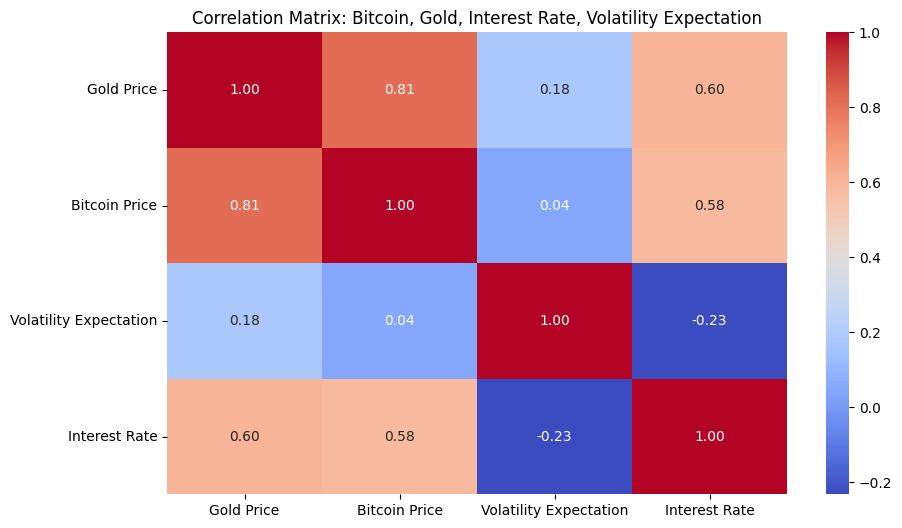

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load data
gold_btc_df = pd.read_csv("merged_gold_btc_prices.csv")
gold_btc_df = gold_btc_df[gold_btc_df['Date'] >= '2009-10-01']
macro_df = pd.read_csv("macro_economic_data.csv")

# Merge all the data
merged_df = pd.merge(gold_btc_df,macro_df,left_on='Date',right_on='DATE',how='left'
)

merged_df.drop(columns=['DATE'], inplace=True)

# Rename columns
merged_df.rename(columns={
    'Price_Gold': 'Gold Price',
    'Price_BTC': 'Bitcoin Price',
    'VIXCLS': 'Volatility Expectation',
    'DFF': 'Interest Rate'
}, inplace=True)

# Check for invalid columns and convert to numeric
cols_to_clean = ['Gold Price', 'Bitcoin Price', 'Volatility Expectation', 'Interest Rate']
for col in cols_to_clean:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Drop rows with NaN values
merged_df.dropna(subset=cols_to_clean, inplace=True)

# Correlation matrix used for analysis

correlation_matrix = merged_df[cols_to_clean].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Display correlation results using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Bitcoin, Gold, Interest Rate, Volatility Expectation')
plt.show()


# Display results using scatter matrix
fig = px.scatter_matrix(
    merged_df,
    dimensions=cols_to_clean,
    title='Scatter Matrix: Bitcoin, Gold, Interest Rate, Volatility Expectation',
    labels={
        'Gold Price': 'Gold',
        'Bitcoin Price': 'Bitcoin',
        'Volatility Expectation': 'Volatility',
        'Interest Rate': 'Interest'
    }
)
fig.show()


# 2. Volatility Analysis # 

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load data
gold_btc_df = pd.read_csv("merged_gold_btc_prices.csv")
gold_btc_df = gold_btc_df[gold_btc_df['Date'] >= '2009-10-01']
macro_df = pd.read_csv("macro_economic_data.csv")

# Merge all the data
merged_df = pd.merge(gold_btc_df,macro_df,left_on='Date',right_on='DATE',how='left'
)

merged_df.drop(columns=['DATE'], inplace=True)

# Rename columns
merged_df.rename(columns={
    'Price_Gold': 'Gold Price',
    'Price_BTC': 'Bitcoin Price',
    'VIXCLS': 'Volatility Expectation',
    'DFF': 'Interest Rate'
}, inplace=True)

# Check for invalid columns and convert to numeric
cols_to_clean = ['Gold Price', 'Bitcoin Price', 'Volatility Expectation', 'Interest Rate']
for col in cols_to_clean:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Drop rows with NaN values
merged_df.dropna(subset=cols_to_clean, inplace=True)

# Calculate the rolling standard deviation over a 30-day window to find the volatility
merged_df['Bitcoin Price Change %'] = merged_df['Bitcoin Price'].pct_change() * 100
merged_df['Gold Price Change %'] = merged_df['Gold Price'].pct_change() * 100

merged_df['Bitcoin Volatility'] = merged_df['Bitcoin Price Change %'].rolling(window=30).std()
merged_df['Gold Volatility'] = merged_df['Gold Price Change %'].rolling(window=30).std()
merged_df['VIX Rolling Avg'] = merged_df['Volatility Expectation'].rolling(window=30).mean()

#  Display results in a interactive line chart with Plotly

fig = go.Figure()

# Bitcoin Volatility
fig.add_trace(go.Scatter(
    x=merged_df['Date'],
    y=merged_df['Bitcoin Volatility'],
    mode='lines',
    name='Bitcoin Volatility',
    line=dict(color='blue')
))

# Gold Volatility
fig.add_trace(go.Scatter(
    x=merged_df['Date'],
    y=merged_df['Gold Volatility'],
    mode='lines',
    name='Gold Volatility',
    line=dict(color='gold')
))

# VIX Rolling Average
fig.add_trace(go.Scatter(
    x=merged_df['Date'],
    y=merged_df['VIX Rolling Avg'],
    mode='lines',
    name='VIX Rolling Avg',
    line=dict(color='green', dash='dot')  
))

fig.update_layout(
    title='Volatility Analysis: Bitcoin vs Gold vs VIX',
    xaxis_title='Date',
    yaxis_title='Volatility (Rolling Std Dev %)',
    legend_title='Assets',
    template='plotly_white',
    yaxis=dict(
        tick0=0,    
        dtick=25  
    )
)

fig.show()


# 3. Recession Analysis #

   Recession Year  Avg Bitcoin Price  Avg Gold Price  Latest Bitcoin Price  \
0            2009           0.000000     1135.010000               96405.7   
1            2020       10792.632857     1805.867143               96405.7   

   Latest Gold Price  Bitcoin Price Change (%)  Gold Price Change (%)  
0             2681.0                  0.000000             136.209373  
1             2681.0                793.254698              48.460534  


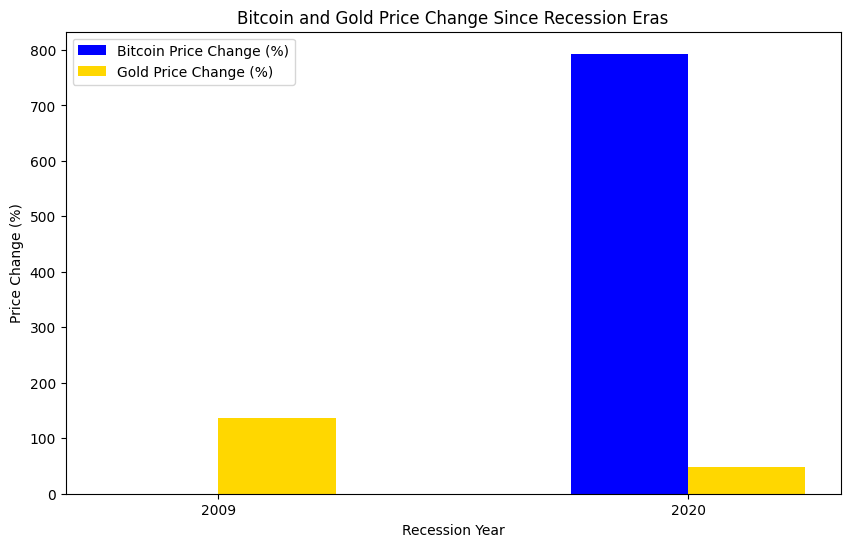

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Recession periods (2009 and 2020) used for analysis
recession_periods = {
    2009: ['2009-01-01', '2009-12-31'],
    2020: ['2020-01-01', '2020-12-31']
}

# List to store results
recession_results = []

for year, dates in recession_periods.items():
    # Filter data for the recession period
    start_date, end_date = dates
    period_data = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]
    
    # Average prices during the recession period
    avg_btc_price = period_data['Bitcoin Price'].mean()
    avg_gold_price = period_data['Gold Price'].mean()
    
    # Present day price
    latest_data = merged_df.iloc[-1]
    latest_btc_price = latest_data['Bitcoin Price']
    latest_gold_price = latest_data['Gold Price']
    
    # Price change from today to average in recession
    btc_price_change = ((latest_btc_price - avg_btc_price) / avg_btc_price * 100) if avg_btc_price else 0
    gold_price_change = ((latest_gold_price - avg_gold_price) / avg_gold_price * 100) if avg_gold_price else 0
    

    recession_results.append({
        "Recession Year": year,
        "Avg Bitcoin Price": avg_btc_price,
        "Avg Gold Price": avg_gold_price,
        "Latest Bitcoin Price": latest_btc_price,
        "Latest Gold Price": latest_gold_price,
        "Bitcoin Price Change (%)": btc_price_change,
        "Gold Price Change (%)": gold_price_change
    })
# DF to display results
recession_df = pd.DataFrame(recession_results)
print(recession_df)

# Plot the data in bar graph 
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
r1 = range(len(recession_df))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, recession_df['Bitcoin Price Change (%)'], color='blue', width=bar_width, label='Bitcoin Price Change (%)')
ax.bar(r2, recession_df['Gold Price Change (%)'], color='gold', width=bar_width, label='Gold Price Change (%)')

# labels 
ax.set_xlabel('Recession Year')
ax.set_ylabel('Price Change (%)')
ax.set_title('Bitcoin and Gold Price Change Since Recession Eras')
ax.set_xticks([r + bar_width / 2 for r in range(len(recession_df))])
ax.set_xticklabels(recession_df['Recession Year'])
ax.legend()
plt.show()


# 4. Interest Rates and VIX vs Price Change Analysis #

c:\Users\kians\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning:

invalid value encountered in subtract



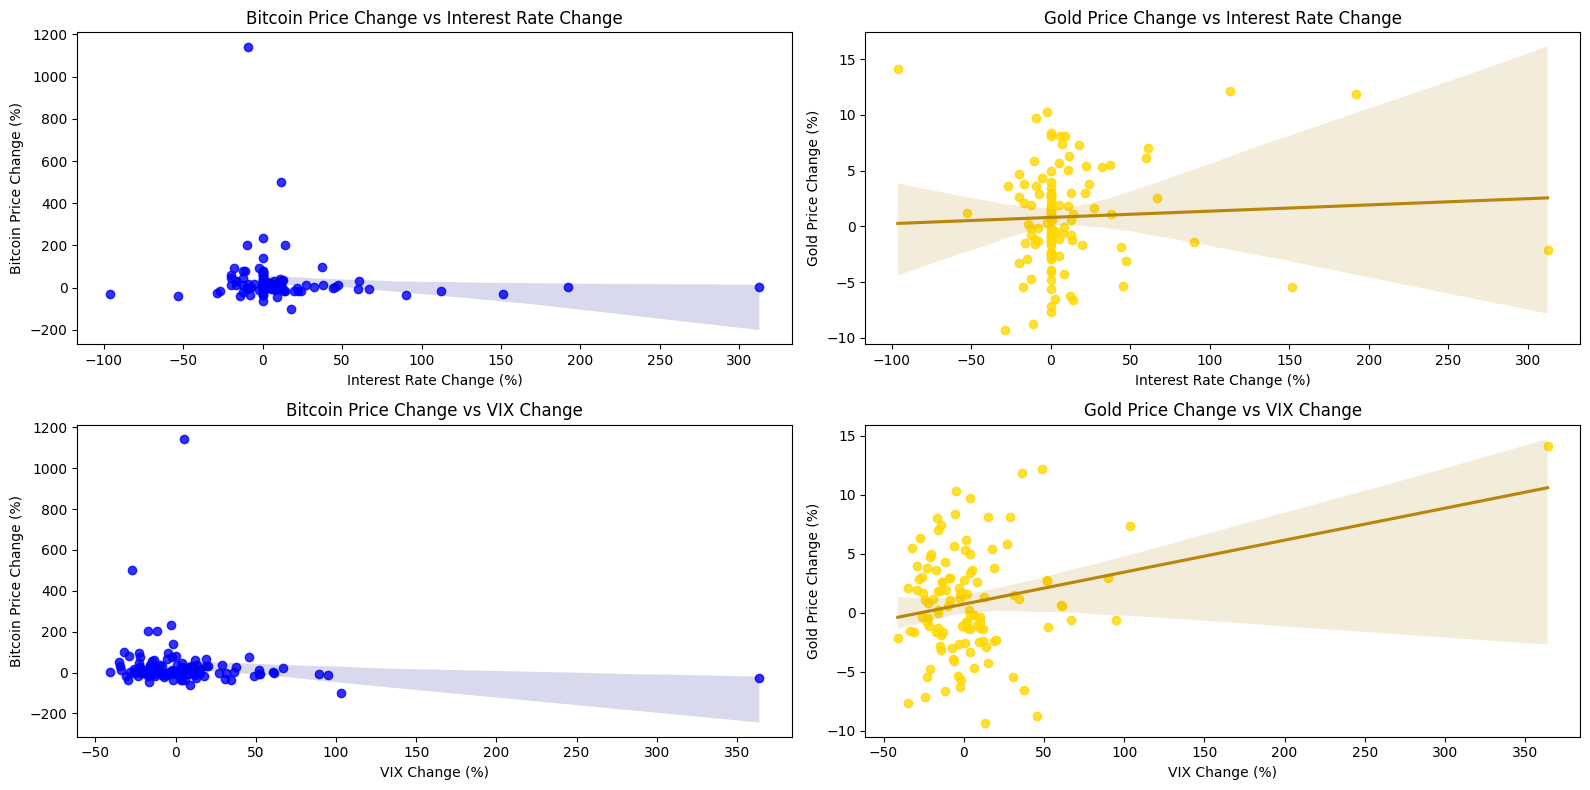

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Percentage changes for data
merged_df['Bitcoin Price Change (%)'] = merged_df['Bitcoin Price'].pct_change(fill_method=None) * 100
merged_df['Gold Price Change (%)'] = merged_df['Gold Price'].pct_change(fill_method=None) * 100
merged_df['Interest Rate Change (%)'] = merged_df['Interest Rate'].pct_change(fill_method=None) * 100
merged_df['VIX Change (%)'] = merged_df['Volatility Expectation'].pct_change(fill_method=None) * 100

filtered_df = merged_df.dropna(subset=[
    'Bitcoin Price Change (%)', 
    'Gold Price Change (%)', 
    'Interest Rate Change (%)', 
    'VIX Change (%)'
])

# Regression plots
plt.figure(figsize=(16, 8))

# Subplot 1: Bitcoin Price vs Interest Rate Change
plt.subplot(2, 2, 1)
sns.regplot(
    x='Interest Rate Change (%)', 
    y='Bitcoin Price Change (%)', 
    data=filtered_df, 
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'darkblue'}
)
plt.title('Bitcoin Price Change vs Interest Rate Change')
plt.xlabel('Interest Rate Change (%)')
plt.ylabel('Bitcoin Price Change (%)')

# Subplot 2: Gold Price vs Interest Rate Change
plt.subplot(2, 2, 2)
sns.regplot(
    x='Interest Rate Change (%)', 
    y='Gold Price Change (%)', 
    data=filtered_df, 
    scatter_kws={'color': 'gold'}, 
    line_kws={'color': 'darkgoldenrod'}
)
plt.title('Gold Price Change vs Interest Rate Change')
plt.xlabel('Interest Rate Change (%)')
plt.ylabel('Gold Price Change (%)')

# Subplot 3: Bitcoin Price vs VIX Change
plt.subplot(2, 2, 3)
sns.regplot(
    x='VIX Change (%)', 
    y='Bitcoin Price Change (%)', 
    data=filtered_df, 
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'darkblue'}
)
plt.title('Bitcoin Price Change vs VIX Change')
plt.xlabel('VIX Change (%)')
plt.ylabel('Bitcoin Price Change (%)')

# Subplot 4: Gold Price vs VIX Change
plt.subplot(2, 2, 4)
sns.regplot(
    x='VIX Change (%)', 
    y='Gold Price Change (%)', 
    data=filtered_df, 
    scatter_kws={'color': 'gold'}, 
    line_kws={'color': 'darkgoldenrod'}
)

# labels
plt.title('Gold Price Change vs VIX Change')
plt.xlabel('VIX Change (%)')
plt.ylabel('Gold Price Change (%)')
plt.tight_layout()
plt.show()


# Results of Analysis #

**Correlation Analysis**

The correlation matrix heatmap shows a strong positive correlation (0.81) between Bitcoin and Gold prices, which means their prices often move together despite having different roles. Bitcoin has weak correlations with VIX (0.04) and interest rates (0.58), while Gold shows stronger correlations with VIX (0.18) and interest rates (0.60). Scatter matrix plots confirm these findings. Bitcoin's price scatter points lack clear trends against VIX and interest rates, while Gold shows more consistent trends with these macroeconomic factors.

**Volatility Analysis**

The interactive line chart reveals Bitcoin’s significantly higher rolling standard deviation compared to Gold, especially during key events like the 2020 recession. This confirms that Bitcoin is far more volatile and riskier as an investment. Gold’s lower and more stable volatility highlights its reliability as a store of value during turbulent times. The VIX (green dashed line) spikes during periods of economic uncertainty, aligning with increased volatility in both assets, although Bitcoin's spikes are far sharper.

**Recession Analysis**

The bar chart comparing Bitcoin and Gold price changes during recession years (2009 and 2020) highlights clear differences. Gold consistently gained modestly in both periods, confirming its role as a safe haven. Bitcoin, unavailable for most of 2009, experienced exponential growth post-2020, far outpacing Gold in today’s value. This growth likely reflects speculative demand rather than investing as a quality asset. Elevated VIX levels during recessions indicate market fear, correlating with Gold's performance.

**Interest Rates and VIX vs. Price Change**

The scatter plots show Gold’s slight positive sensitivity to VIX changes, with a clear upward trend in Gold price change versus VIX. This suggests Gold benefits during periods of heightened market fear. In contrast, Bitcoin’s scatter plots against interest rates and VIX reveal minimal trends, highlighting Bitcoin’s weak connection to traditional financial indicators. The flat regression lines for Bitcoin confirm its seperate behaviour from macroeconomic drivers.

# Conclusion #
Gold consistently acts as a safe-haven asset, providing stability and moderate returns during recessions and high volatility. It shows a stronger connection to traditional indicators like interest rates and VIX, supporting its hedge role. Bitcoin delivers exceptional returns during and after the 2020 recession but brings significantly higher risk and volatility. Gold suits low risk investors, while Bitcoin attracts those seeking high returns and willing to face higher risks.

Gold and Bitcoin play different roles in investment portfolios. Gold serves as a reliable hedge against economic uncertainty and volatility. Bitcoin, however, functions as a speculative asset. Although Bitcoin’s role may change in the future, the current data shows it does not match Gold’s stability and reliability as a hedge.


# Handle Outliers #


C:\Users\kians\AppData\Local\Temp\ipykernel_1264\2888253542.py:22: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Interest Rate Change (%)'] = df['DFF'].pct_change() * 100


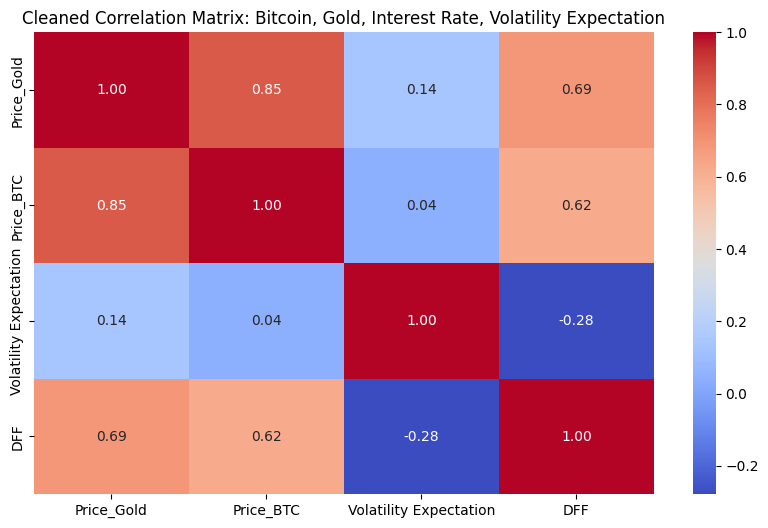

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
gold_btc_df = pd.read_csv("merged_gold_btc_prices.csv")
gold_btc_df = gold_btc_df[gold_btc_df['Date'] >= '2009-10-01']
macro_df = pd.read_csv("macro_economic_data.csv")

# Merge all the data
df = pd.merge(gold_btc_df, macro_df, left_on='Date', right_on='DATE', how='left')

# Ensure columns are numeric
numeric_columns = ['Price_BTC', 'Price_Gold', 'DFF', 'VIXCLS']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

# Calculate percentage change and rename columns
df['Bitcoin Price Change (%)'] = df['Price_BTC'].pct_change() * 100
df['Gold Price Change (%)'] = df['Price_Gold'].pct_change() * 100
df['Interest Rate Change (%)'] = df['DFF'].pct_change() * 100
df['Volatility Expectation'] = df['VIXCLS']  

# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# New DF to remove outliers
cleaned_df = df.copy()
for col in ['Bitcoin Price Change (%)', 'Gold Price Change (%)', 'Interest Rate Change (%)', 'Volatility Expectation']:
    cleaned_df = remove_outliers(cleaned_df, col)

# New correlation matrix with outliers removed
cleaned_corr_matrix = cleaned_df[['Price_Gold', 'Price_BTC', 'Volatility Expectation', 'DFF']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cleaned Correlation Matrix: Bitcoin, Gold, Interest Rate, Volatility Expectation')
plt.show()


# Comparison of Results and Reason for Difference #



After removing outliers, the correlation matrix explains a clearer relationships between the variables. Outliers distorted the original correlations by exaggerating or suppressing certain trends. Without these outliers, the correlation between Gold and Bitcoin prices slightly increased, highlighting a stronger positive connection. The correlations between Gold, Bitcoin, and interest rates also strengthened, showing that outliers had suppressed the consistency of these relationships.

The weak correlation with the VIX remained unchanged, confirming that VIX changes have a limited and consistent impact on asset prices even after removing the outliers. The stronger negative correlation between VIX and interest rates now better reflects economic patterns, where heightened market volatility often correlates with lower interest rates during uncertainty. Removing outliers eliminated the noise caused by extreme data points, allowing the analysis to present more accurate and reliable trends.